# Métricas de Classificação 2

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/regis/tmp/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

In [5]:
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [6]:
model = linear_model.LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_pred = model.predict(X_test_std)

## Matriz de confusão

In [8]:
metrics.confusion_matrix(y_test, y_pred)

array([[44,  1,  0],
       [ 0, 41,  4],
       [ 0,  2, 43]])

## Classification Report

In [9]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        45
Iris-versicolor       0.93      0.91      0.92        45
 Iris-virginica       0.91      0.96      0.93        45

      micro avg       0.95      0.95      0.95       135
      macro avg       0.95      0.95      0.95       135
   weighted avg       0.95      0.95      0.95       135



## Accuracy Score

In [10]:
metrics.accuracy_score(y_test, y_pred)

0.9481481481481482

## Precision Score

In [11]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.9489039329464861

## Recall Score

In [12]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.9481481481481482

## F1 Score

In [13]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.9482983227487379

## Matriz de Probabilidades

In [14]:
y_score = model.predict_proba(X_test_std)
print(model.classes_)
print(y_score[:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[8.79823116e-01 1.18453500e-01 1.72338471e-03]
 [9.51866918e-01 4.73691397e-02 7.63942380e-04]
 [9.80512565e-01 1.91478828e-02 3.39552018e-04]
 [9.15521096e-01 8.33181981e-02 1.16070589e-03]
 [6.05656059e-02 6.39334343e-01 3.00100052e-01]]


## Log Loss

In [15]:
metrics.log_loss(y_test, y_score)

0.3043751957201962

## ROC Curve e AUC para Iris-versicolor

In [16]:
print(model.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:, 1], pos_label='Iris-versicolor')
print('AUC', metrics.auc(fpr, tpr))
#metrics.auc(y_test, y_score)

AUC 0.982716049382716


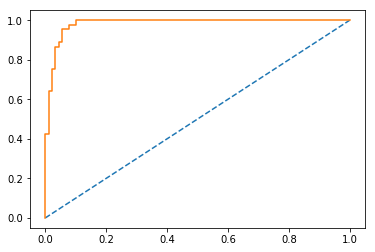

In [18]:
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr);

## Outra forma de calcular AUC

In [19]:
y_test_binary = np.where(y_test =='Iris-versicolor', 1, 0)

In [20]:
metrics.roc_auc_score(y_test_binary, y_score[:, 1])

0.982716049382716